In [1]:
''' Plotly is used to visualize candle sticks. '''
# pip install plotly

' Plotly is used to visualize candle sticks. '

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from binance.client import Client
from datetime import datetime


### Example to the downloaded data 

In [3]:
client = Client(
    api_key = 'm8MugRybcSpdBq223NPLvSM3ksD9J8r8ATxnMnWCZCAGRyvGLLtQkmsaWZ5b8u38', 
    api_secret = 'JzFpaKywWsNiMc01b4F8TVVoqzyiCc74SMYY0mPdYKrYkhXtZGaVRjxKNmqQRRmu'
    )

def to_formated_df(binance_list):
    df = pd.DataFrame(binance_list)
    df = df[df.columns[:6]]
    df.columns =   [
                    'time',
                    'open',
                    'high',
                    'low',
                    'close',
                    'volume'
                    ]
    df = df.apply(pd.to_numeric)
    df['time'] = (df['time']/1000).apply(datetime.fromtimestamp)
    df.set_index(['time'], inplace=True)

    return df


def create_df(n=3):
    now = datetime.now()
    x = datetime.timestamp(datetime.now())
    y = x // 3600
    timestamp = int(y) * 3600
    _500hours = 3600 * 500

    df = pd.DataFrame()
    for i in range(n):
        times = i + 1
        start_time = (timestamp - _500hours * times) * 1000
        candles = client.get_klines(symbol='BTCUSDT', interval=Client.KLINE_INTERVAL_1HOUR, startTime=start_time)
        new_df = to_formated_df(candles)
        df = pd.concat([new_df, df])

    # df.to_csv('./data/data.csv')

    return df


In [4]:
datetime.now()

datetime.datetime(2020, 12, 13, 23, 20, 47, 63535)

In [5]:
df_example = create_df(n=1)
df_example

,open,high,low,close,volume
time,,,,,
2020-11-23 03:00:00,18211.56,18349.05,18188.26,18210.50,2722.722409
2020-11-23 04:00:00,18210.49,18436.70,18180.14,18369.00,2749.246581
2020-11-23 05:00:00,18367.49,18515.45,18337.04,18461.19,2543.773785
2020-11-23 06:00:00,18461.19,18509.98,18381.14,18438.26,2315.744168
2020-11-23 07:00:00,18438.26,18520.00,18308.00,18520.00,3063.316519
...,...,...,...,...,...
2020-12-13 19:00:00,19273.59,19273.60,19172.33,19185.33,1636.424148
2020-12-13 20:00:00,19185.33,19233.00,19155.00,19193.78,1307.778726
2020-12-13 21:00:00,19193.28,19193.29,19089.63,19154.57,1908.194970


### Let's get the project data and visualize it!

In [6]:
df = pd.read_csv('./data/data.csv', index_col='time')
df

,open,high,low,close,volume
time,,,,,
2020-08-30 14:00:00,11603.09,11615.71,11563.11,11598.75,1776.930843
2020-08-30 15:00:00,11598.75,11665.11,11592.94,11628.01,2709.298855
2020-08-30 16:00:00,11627.64,11634.54,11600.17,11620.03,2045.906069
2020-08-30 17:00:00,11620.02,11658.99,11557.69,11616.20,2615.250909
2020-08-30 18:00:00,11616.21,11685.00,11580.00,11665.70,2767.038960
...,...,...,...,...,...
2020-12-12 13:00:00,18506.10,18525.33,18427.01,18445.15,1831.731773
2020-12-12 14:00:00,18445.14,18451.35,18388.88,18400.21,1443.035834
2020-12-12 15:00:00,18400.21,18475.63,18308.82,18372.97,2537.663833


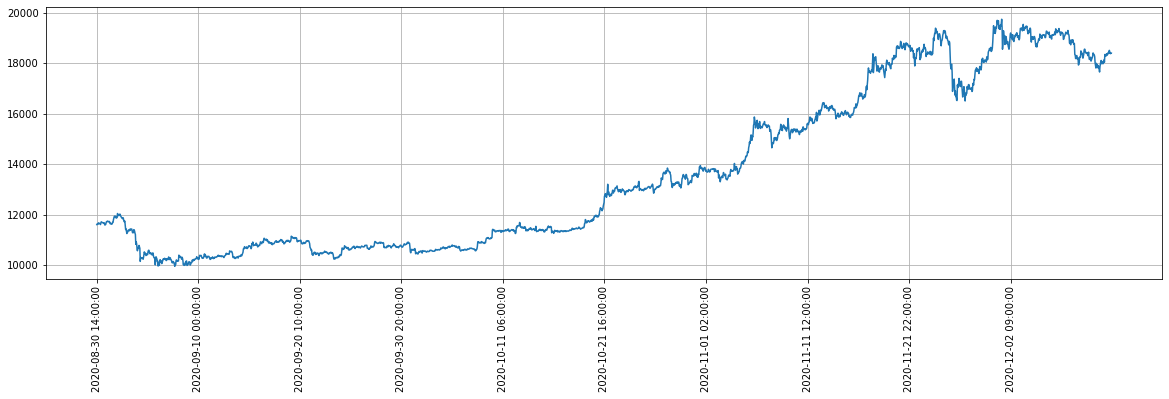

In [7]:
tick_loc = [i for i in range(len(df)) if i % 250 == 0]

plt.figure(figsize=(20,5))
plt.xticks(tick_loc, rotation=90)
plt.plot(df.index, df.close)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### Candle Sticks Version

In [8]:
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])])

fig.update_layout(
    autosize=False,
    width=1200,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=20,
        t=30,
        pad=4
    ),
)
fig.show()